In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('./data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


# 1. 단순회귀모형
- 회귀분석 : 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
- 설명변수(독립변수) : 원인이 되는 변수
- 반응변수(종속변수) : 결과가 되는 변수
- 단순회귀모형 : 설명변수와 반응변수가 1개씩인 회귀모형

In [4]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1 # 설명변수의 수

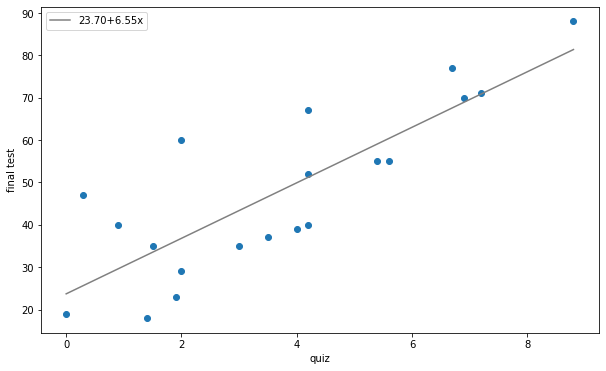

In [5]:
poly_fit = np.polyfit(x, y, 1) # (b1, b0) 반환
poly_1d = np.poly1d(poly_fit) # y=b1x+b0 함수 생성
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

## 1-1. 회귀분석에서의 가설

$ Y_i = \beta_0 + \beta_1x_i+\epsilon_i \quad (i=1,2,...,n)$
- $\epsilon_i$ : 오차항
- 설명변수가 확률변수는 아니다.
- 오차항은 서로 독립이고 $N(0, \sigma^2)$을 따른다.
    - 확률변수 $Y_i$는 서로 독립이고 $N(\beta_0 + \beta_1x_i, \sigma^2)$을 따른다.  
  
회귀직선 : $y = \hat {\beta_0} + \hat {\beta_1}x$  
회귀계수 : $\hat {\beta_0} ,\, \hat {\beta_1}$

## 1-2. `statsmodel`에 의한 회귀분석

In [6]:
formula = 'final_test ~ quiz' # '설명변수 ~ 반응변수'
result = smf.ols(formula, df).fit() # ols : Ordinary Least Squares(최소제곱법)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.59e-06
Time:                        21:28:02   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

두 번째 표에 대하여
1. 행의 의미
- `Intercept` : 절편 $\beta_0$
- `quiz` : 기울기 $\beta_1$
  
2. 열의 의미
- `coef` : 회귀계수의 추정값
- `std err` : 추정값의 표준오차
- `t` : 회귀계수에 관한 t 검정통계량
- `P>|t|` : t 검정통계량의 p값
- `[0.025 0.975]` : 회귀계수의 95% 신뢰구간

### 점추정
- 예측값 $\hat{y_i}=\hat {\beta_0} + \hat {\beta_1}x$
- 잔차 $\hat{\epsilon_i}=y_i-\hat{y_i}$
- 잔차제곱합(Residual Sum of Squares; RSS) $\sum _i^n \hat {\epsilon_i}^2$
    - 최소제곱법 : RSS를 가장 작게 하는 회귀계수 구하기

In [9]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

$\left[
\begin{matrix}
    1 & x_1 \\
    1 & x_2 \\
    1 & x_3 \\
    ... & ... \\
    1 & x_n \\
\end{matrix}
\right]
\left[
\begin{matrix}
    \beta_0 \\
    \beta_1 \\
\end{matrix}
\right]
=\left[
\begin{matrix}
    y_1 \\
    y_2 \\
    y_3 \\
    ... \\
    y_n \\
\end{matrix}
\right]  \\
\Leftrightarrow Xb = y \Rightarrow b = (X^TX)^{-1}X^Ty$

In [10]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

C:\Users\master\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(23.699495346731215, 6.553732606043083)

In [11]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [12]:
# 회귀계수의 수가 2이므로 자유도는 n-2
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

### 구간추정
$\hat{\beta_0}$와 $\hat{\beta_1}$의 표준오차는 각각 $\sqrt{C_0\hat\sigma^2}$, $\sqrt{C_1\hat\sigma^2}$  
$(XX^T)^{-1}$의 대각성분의 첫 번째가 $C_0$, 두 번째가 $C_1$

In [13]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [14]:
np.sqrt(s_var*C0), np.sqrt(s_var*C1)

(4.713837012645704, 1.0685841387335373)

### 회귀계수의 신뢰구간
$\left[ \hat\beta_i - t_{\alpha/2}(n-2)\sqrt{\hat\sigma^2C_i}, \hat\beta_i - t_{1-\alpha/2}(n-2)\sqrt{\hat\sigma^2C_i} \right] \quad (i=0, 1)$

#### $\beta_0$

In [16]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.79609127276025, 33.60289942070218)

#### $\beta_1$

In [18]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125891, 8.798744574960276)

### t 검정
- 귀무가설 : $\beta_1 = 0$
- 대립가설 : $\beta_1 \ne 0$
- 검정통계량 $t = \dfrac{\hat \beta_1-\beta_1}{\sqrt{\hat\sigma^2C_1}}=\dfrac{\hat \beta_1}{\sqrt{\hat\sigma^2C_1}}$

#### $\beta_1$

In [19]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.1330992745320225

In [21]:
# p-value
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

#### $\beta_0$

In [22]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [23]:
# p-value
(1 - rv.cdf(t)) * 2

8.745298393209033e-05

# 2. 중회귀모형
- 설명변수가 2개 이상인 모형  

$y = \beta_0 + \beta_1x_1+...+\beta_px_p$,  
$Y_i = \beta_0 + \beta_1x_{i1}+...+\beta_px_{ip}+\epsilon_i$

In [24]:
formula = 'final_test ~ quiz + sleep_time' # '반응변수 ~ 설명변수1 + 설명변수2'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.19e-06
Time:                        22:26:45   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-1. 회귀계수

In [25]:
x1 = df['quiz']
x2 = df['sleep_time']

y = df['final_test']
p = 2 # 설명변수 개수

$\left[
\begin{matrix}
    1 & x_{11} & x_{12}\\
    1 & x_{21} & x_{22} \\
    1 & x_{31} & x_{32} \\
    ... & ... & ... \\
    1 & x_{n1} & x_{n2} \\
\end{matrix}
\right]
\left[
\begin{matrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
\end{matrix}
\right]
=\left[
\begin{matrix}
    y_1 \\
    y_2 \\
    y_3 \\
    ... \\
    y_n \\
\end{matrix}
\right]  \\
\Leftrightarrow Xb = y \Rightarrow b = (X^TX)^{-1}X^Ty$

In [27]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

C:\Users\master\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(-1.8709143470995777, 6.428878343002363, 4.1917065463986845)

In [28]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [29]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

#### $\beta_2$의 신뢰구간

In [30]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.4402533325435849, 7.943159760253783)

## 2-2. 가변수
- 질적변수를 양적변수로 변환하여 회귀모형을 표현하는 기법
- 예시에서 통학방법이 '버스', '자전거', '도보'로 3개이므로 가변수는 3-1=2개가 필요함
- $Y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \beta_3x_{도보} + \beta_4x_{자전거} + \epsilon_i \\$
    - 도보 : ($x_{도보} = 1,\ x_{자전거} = 0$), 자전거 : ($x_{도보} = 0,\ x_{자전거} = 1$), 버스 : ($x_{도보} = 0,\ x_{자전거} = 0$)

In [31]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           7.47e-05
Time:                        22:43:35   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. 모형의 선택

- 적합이 좋다 : 회귀직선이 데이터에 잘 들어맞고 잔차가 작은 모형일 때
- 예측이 좋다 : 모르는 데이터의 설명변수라도 모형이 반응변수를 잘 설명할 때
- **과적합** : 적합이 지나치게 좋고 예측이 좋지 않을 때

In [32]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz' # '설명변수 ~ 반응변수'
result = smf.ols(formula, df).fit() # ols : Ordinary Least Squares(최소제곱법)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.59e-06
Time:                        22:49:53   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [34]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [35]:
np.sum(eps_hat ** 2)

2417.2278252292617

## 3-1. 결정계수
- 총변동 (Total Variation) : $\sum^n_{i=1}(y_i-\bar y)^2$ (관측값이 어느 정도 분산되어 있는지)
- 회귀변동 (Regression Variation) : $\sum^n_{i=1}(\hat y_i-\bar y)^2$ (예측값이 평균값에 대해서 어느 정도 분산되어 있는지)
- 잔차변동 (Residual Variation) : $\sum_{i=1}^n \hat \epsilon_i^2=\sum^n_{i=1}(y_i-\hat y_i)^2$ (잔차의 산포도)
- 총변동 = 회귀변동 + 잔차변동
- 결정계수(R-squared) : $R^2 = \dfrac{회귀변동}{총변동} = 1-\dfrac{잔차변동}{총변동}$

In [36]:
total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [38]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [39]:
exp_var / total_var

0.6763457665504996

### 단순회귀의 결정계수는 상관계수의 제곱과 같다.
$ R^2 = r_{xy}^2$

In [40]:
np.corrcoef(x,y)[0, 1] ** 2

0.6763457665504998

- 기말고사 ~ 쪽지 시험 : 0.676
- 기말고사 ~ 쪽지 시험 + 수면 시간 : 0.756
- 기말고사 ~ 쪽지 시험 + 수면 시간 + 통학 방법 : 0.782  

**값이 클수록** 좋은 모델이므로 결과만 봤을 때 마지막이 좋아보이지만, 의미 없는 변수가 추가되어도 설명변수가 증가하면 결정계수도 증가하므로 다른 방법을 봐야 한다.

## 3-2. 조정결정계수
조정결정계수 : 설명변수를 추가했을 때, 그 변수가 어느 정도의 설명력이 없는 경우 결정계수가 증가하지 않도록 조정하는 결정계수,  
자유도조정 결정계수라고도 함  
$ \bar R^2 = 1 - \dfrac{잔차변동 / (n-p-1)}{총변동 / (n-1)}$  
총변동의 자유도($n-1$) = 회귀변동의 자유도($p$) + 잔차변동의 자유도($n-p-1$)

In [41]:
1 - (unexp_var / (n-p-1)) / (total_var / (n - 1))

0.6583649758033058

- 기말고사 ~ 쪽지 시험 : 0.658
- 기말고사 ~ 쪽지 시험 + 수면 시간 : 0.727
- 기말고사 ~ 쪽지 시험 + 수면 시간 + 통학 방법 : 0.724  

**값이 클수록** 좋은 모델이므로 결과적으로 쪽지 시험 + 수면 시간 모델이 가장 적합하다.

## 3-3. F 검정

- 귀무가설 : $\beta_1=\beta_2=...=\beta_p=0$
- 대립가설 : 적어도 하나의 $\beta_i$는 0이 아니다.  

$ F = \dfrac{MSR}{MSE}=\dfrac{회귀변동 / p}{잔차변동 / (n-p-1)}$, 자유도$=(p,\ n-p-1)$
- 분산분석(Analysis of Variance; ANOVA) : 모형의 분산 / 잔차의 분산이므로 분산의 비를 검정하고 있다고 해석 가능

In [43]:
f = (exp_var / p) / (unexp_var / (n - p - 1))
f

37.61490671126523

In [44]:
# p-value
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

## 3-4. 최대로그우도와 AIC

### 우도(Likelyhood)
- 어떤 관측값을 얻을 확률
- 예시 : 앞면(1)이 나올 확률이 p일 때, [0, 1, 0, 0, 1]이 나올 확률

In [45]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030869999999999995

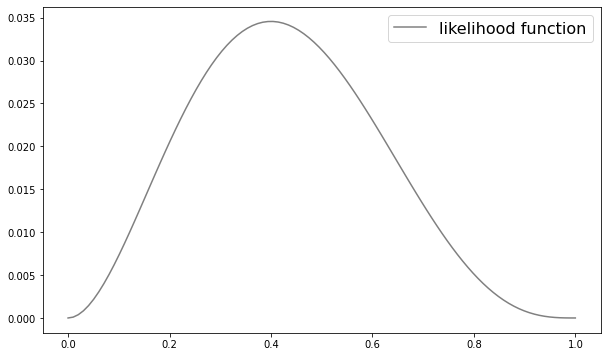

In [46]:
# p를 0에서 1로 변화시킬 때 우도함수
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

- 최우추정법 : 관측값에서 가장 그럴듯하다는 이유로 모수 $p$를 추정하는 방법 
- 최우추정량 ; 그 추정량 (예:$p=0.4$)
- 최우추정값 : 그 추정값  

- 우도 : $L= \prod_{i=1}f(x_i)$  
- 로그우도 : $\log L = \sum_{i=1}\log f(x_i)$
    - 최대로그우도 : 로그우도함수가 최대가 될 때의 값

In [49]:
prob = 0.4
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf(coin_result)))
mll

-3.365058335046282

### 최대로그우도
$ Y_i \sim N(\beta_0 + \beta_1x_1, \sigma^2)$일 때 $(x_1, y_1),\ (x_2, y_2),\ ...,\ (x_n, y_n)$이 나올 확률에 대한 최대로그우도  
: 표의 Log-Likelyhood  

- $\beta_0, \beta_1, \sigma^2$에 대한 최우추정량은 각각 $\hat \beta_0, \hat \beta_1, \frac 1 n \sum_{i=1}^n \hat \epsilon_i^2$
- 그러므로 최대로그우도는 $N(\hat y, \frac 1 n \sum_{i=1}^n \hat \epsilon_i^2)$의 밀도함수를 $f(x)$로 함

In [50]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

- 기말고사 ~ 쪽지 시험 : -76.325
- 기말고사 ~ 쪽지 시험 + 수면 시간 : -73.497
- 기말고사 ~ 쪽지 시험 + 수면 시간 + 통학 방법 : -72.368  

**값이 클수록** (음수이므로 절댓값이 작을수록) 적합도가 높으나 이 또한 결정계수처럼 설명변수를 늘리면 값이 증가하므로 다른 방식을 사용

### AIC (Akaike's Information Criterion)
- 구하는 방식은 다양하다.
- `statsmodels`에서는 $AIC = -2\times 최대로그우도 + 2 \times 회귀계수의 수$를 사용한다.
    - 회귀계수의 수를 페널티로 부가하여 설명변수를 늘렸다고 좋은 모형으로 선택되지 않도록 함

In [51]:
aic = -2 * mll + 2 * (p+1)
aic

156.65042857248076

- 기말고사 ~ 쪽지 시험 : 156.7
- 기말고사 ~ 쪽지 시험 + 수면 시간 : 153.0
- 기말고사 ~ 쪽지 시험 + 수면 시간 + 통학 방법 : 154.7 

**값이 작을수록** 적합도가 높으므로 쪽지 시험 + 수면 시간이 가장 적합한 모형이다.

### 베이지안 정보 기준 (Bayseian Information Criterion; BIC)
- AIC와 유사하다.
- $BIC = -2 \times 최대로그우도 + \log n \times 회귀계수의 수$
    - 표본 크기 n에 대해서도 페널티를 부과한 것이다.

In [52]:
bic = -2 * mll + np.log(n) * (p+1)
bic

158.64189311958876

- 기말고사 ~ 쪽지 시험 : 158.6
- 기말고사 ~ 쪽지 시험 + 수면 시간 : 156.0
- 기말고사 ~ 쪽지 시험 + 수면 시간 + 통학 방법 : 159.7 

**값이 작을수록** 적합도가 높으므로 쪽지 시험 + 수면 시간이 가장 적합한 모형이다.

# 4. 모형의 타당성
- 분석 대상 : 잔차($\hat \epsilon_i$)

In [53]:
# AIC를 기준으로 좋은 모형이라 판단된 모형을 사용
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.19e-06
Time:                        23:53:35   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4-1. 정규성 검정
- 오차항 $\epsilon_i$가 $N(0, \sigma^2)$을 따른다는 가정이 타당한지 검정
- 귀무가설 : 잔차항이 정규분포를 따른다.
- 대립가설 : 잔차항이 정규분포를 따르지 않는다.

세 번째 표에 대하여
- `Prob(Omnibus)`, `Prob(JB)`가 p-value이고 유의수준 5%보다 크면 타당함
- `Skew` : 왜도 (좌우대칭인 정도), $\sum\limits^n_i \left( \dfrac {x-\bar x}{S}\right)^3$
    - 좌우대칭이면 0, 왼쪽으로 치우치면 양수, 오른쪽으로 치우치면 음수 (꼬리가 긴 쪽의 부호를 따라간다.)
- `Kurtosis` : 첨도 (뾰족한 정도), $\sum\limits^n_i \left( \dfrac {x-\bar x}{S}\right)^4$
    - 정규분포이면 3, 둥글면 3보다 작은 값

In [55]:
stats.skew(eps_hat)

0.670

In [56]:
stats.kurtosis(eps_hat, fisher=False)

2.422

## 4-2. 더빈-왓슨비
세 번째 표에 대하여
- `Durbin-Watson` :  다른 오차항이 서로 무상관인지 여부를 체크하는 지표
- $\dfrac {\sum\limits_{i=2}^n\left(\hat \epsilon_i - \hat \epsilon_{i-1}\right)^2}{\sum\limits_{i=1}^n\hat\epsilon_i^2}$
    - 0~4의 값을 가지며, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관, 2와 비슷하면 무상관

In [57]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.4783410441735643

## 4-3. 다중공선성
세 번째 표에 대하여
- `Cond. No.` : 조건수, 작을 수록 좋음
    - 값이 크면 다중공선성과 설명변수 사이에 강한 상관이 생겼다는 것을 의미함
- 다중공선성이 크면 회귀계수의 분산이 커져 모형의 예측 결과가 나빠짐

In [58]:
# 극단적으로 중간고사 점수를 퀴즈의 두 배로 설정
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [59]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           8.59e-06
Time:                        00:27:29   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- `Cond. No.`가 1.09e+17로 매우 큰 값이 되고
- `Notes`의 `[2]`에서 강한 다중공선성 문제가 발생했다고 나온다.